# Investment Portfolio Analysis

### Author: Toni Esteves
This Project is from the coursera course: Investment Strategies and Portfolio Analysis, from Rice University

## Week 1: Performance Measurement and Benchmarking of Portfolio Data

Compute the following return and risk measures for the DSFCX and DSFVX funds along with the S&P 500 index. Use S&P 500 index as the benchmark for all your analysis. (Hint: Note that you will not be computing excess return and risk measures for the S&P 500 index)

**Note**: Take the average returns for S&P to calculate the excess return for both the funds.



Here provides the performance data of three underlying assets:
- DFSCX	
- DFSVX 
- S&P 500

This project will compute the following indicators
1. Arithmetic average monthly return
2. Monthly standard deviation
3. Geometric average monthly return
4. Annualized arithmetic average return
5. Annualized volatility
6. Arithmetic mean excess monthly return
7. Annualized arithmetic mean excess return
8. Geometric mean excess monthly return
9. Annualized geometric mean excess return
10. Target semideviation
11. Tracking error


In [32]:
import pandas as pd
import numpy as np
from datetime import datetime
import math

df = pd.read_csv("../data/PortfolioData.csv")
df['Date'] = df['Date'].apply(lambda x : datetime.strptime(str(x), "%Y%m%d"))


In [33]:
stats = df.describe()
stats

,Date,DFSCX,DFSVX,SP500,Risk-free
count,417,417.000000,282.000000,417.000000,417.000000
mean,1999-05-31 03:06:28.489208576,0.010978,0.010790,0.007859,0.003250
min,1982-01-29 00:00:00,-0.291931,-0.221374,-0.217630,-0.000037
25%,1990-09-28 00:00:00,-0.021368,-0.018471,-0.017004,0.000817
50%,1999-05-28 00:00:00,0.015924,0.013998,0.010491,0.003642
75%,2008-01-31 00:00:00,0.045010,0.045323,0.035224,0.004767
max,2016-09-30 00:00:00,0.235778,0.196560,0.131767,0.011290
std,NaN,0.056161,0.055083,0.043191,0.002513


### 1. Arithmetic average monthly return
$$r_a = \frac{1}{T}\sum^T_{t=1}r_t$$



In [38]:
stats.iloc[1,1:4]

DFSCX    0.010978
DFSVX     0.01079
SP500    0.007859
Name: mean, dtype: object

### 2. Monthly standard deviation

In [39]:
stats.iloc[7,1:4]

DFSCX    0.056161
DFSVX    0.055083
SP500    0.043191
Name: std, dtype: object

### 3. Geometric Average Monthly Return
$$r_g = \{\prod^T_{t=1}(1+r_t)\}^{{1}/{T}}-1$$

In [44]:
stats.iloc[0,1:4]

DFSCX    417.0
DFSVX    282.0
SP500    417.0
Name: count, dtype: object

In [41]:
print(f"DFSCX: {np.prod(df['DFSCX'].apply(lambda x : 1+x)) ** (1/417) - 1}")
print(f"DFSVX: {np.prod(df['DFSVX'].apply(lambda x : 1+x)) ** (1/282) - 1}")
print(f"SP500: {np.prod(df['SP500'].apply(lambda x : 1+x)) ** (1/417) - 1}")

DFSCX: 0.0093720408697191
DFSVX: 0.009251443277496385
SP500: 0.006913897965702409


### 4. Annualized Arithmetic Average return

In [42]:
stats.iloc[1,1:4] * 12

DFSCX    0.131731
DFSVX    0.129479
SP500    0.094308
Name: mean, dtype: object

### 5. Annualized volatility

In [43]:
sqrt_12 = math.sqrt(12)

stats.iloc[7,1:4] * sqrt_12

DFSCX    0.194547
DFSVX    0.190812
SP500    0.149616
Name: std, dtype: object

### 6. Arithmetic mean excess monthly return

In [45]:
rb = 0.007859 # take S&P 500 as benchmark

stats.iloc[1,1:4] - rb

DFSCX    0.003119
DFSVX    0.002931
SP500         0.0
Name: mean, dtype: object

### 7. Annualized arithmetic mean excess return

In [47]:
(stats.iloc[1,1:4] - rb) * 12

DFSCX    0.037423
DFSVX    0.035171
SP500         0.0
Name: mean, dtype: object

### 8. Geometric mean excess monthly return $r_{xg}$
$$r_{xg} = \frac{1+r_{pg}}{1+r_{bg}} - 1$$
where $r_{pg}$ is the geometric average of portfolio, $r_{bg}$ is the geometric average of benchmark.





### 9. Annualized geometric mean excess return
$$r_{g,annual} = (1+r_{g,month})^{12} - 1$$

In [9]:
r_bg1 = np.prod(df['SP500'].apply(lambda x : 1+x)) ** (1/417) - 1

adjusted_sp500 = df['SP500'][df['DFSVX'].dropna().index]
r_bg2 = np.prod(adjusted_sp500.apply(lambda x : 1+x)) ** (1/282) - 1

r_pg1 = 0.0093720408697191
r_pg2 = 0.009251443277496385

r_xg1 = (1 + r_pg1) / (1 + r_bg1) - 1
r_xg2 = (1 + r_pg2) / (1 + r_bg2) - 1

print('DFSCX monthly: ',r_xg1)
print('DFSVX monthly: ',r_xg2)

print('DFSCX annualized: ', (1 + r_xg1) ** 12 - 1)
print('DFSVX annualized: ', (1 + r_xg2) ** 12 - 1)

DFSCX monthly:  0.002441264252070585
DFSVX monthly:  0.0036526687797715507
DFSCX annualized:  0.029691734434132755
DFSVX annualized:  0.04472340672773201


### 10. Target semideviation
- semideviation is computed by squaring only negative deviations from the mean
- the square root of semivariance is called semideviation
- suppose you have a return target, or a minumum acceptable return (MAR)
- target semivariance is the expected squared deviations below the target
- target semideviation is the square root of target semivariance, as a measure of downside risk, it is also a special case of lower partial moments(LPM) methodology for dealing with downside variation
- formula for a lower partial moment of degree p
$$LPM_{p} = \sum^N_{i=1}w_i d(i)(R_i-\tau)^p$$
where $d(i)$ is the indicator, equal to 1 if $R_i <\tau$, and 0 otherwise; $w_i = 1/N$ is the weight, Note that $N$ is the number of $d_i=1$
- downside semivariance is a special case of the LPM methodology with power p = 2 and target equal to the mean, which is useful when comparing distributions that are not normal and have different means
- upside semideviation is the converse of downside semivariance

In [10]:
df['di_DFSCX'] = df['DFSCX'].apply(lambda x: 1 if x < df['DFSCX'].mean() else 0)
df['di_DFSVX'] = df['DFSVX'].apply(lambda x: 1 if x < df['DFSVX'].mean() else 0)
df['di_SP500'] = df['SP500'].apply(lambda x: 1 if x < df['SP500'].mean() else 0)

In [11]:
N1 = len(df[df['di_DFSCX'] == 1])
N2 = len(df[df['di_DFSVX'] == 1])
N3 = len(df[df['di_SP500'] == 1])

print(N1, N2, N3)

190 130 191


In [12]:
df

,Date,DFSCX,DFSVX,SP500,Risk-free,di_DFSCX,di_DFSVX,di_SP500
0,1982-01-29,-0.019600,NaN,-0.017544,0.007306,1,0,1
1,1982-02-26,-0.029575,NaN,-0.060548,0.009176,1,0,1
2,1982-03-31,-0.008601,NaN,-0.010167,0.011077,1,0,1
3,1982-04-30,0.038346,NaN,0.040014,0.011290,0,0,0
4,1982-05-28,-0.024758,NaN,-0.039162,0.009592,1,0,1
...,...,...,...,...,...,...,...,...
412,2016-05-31,0.010662,0.004742,0.015329,0.000115,1,1,0
413,2016-06-30,-0.001737,-0.011581,0.000906,0.000188,1,1,1
414,2016-07-29,0.050167,0.048516,0.035610,0.000171,0,0,0
415,2016-08-31,0.015924,0.017352,-0.001219,0.000165,0,0,1


In [13]:
df['indicator_squared_deviation_DFSCX'] = df['di_DFSCX'] * ((df['DFSCX'] - df['DFSCX'].mean())**2)
df['indicator_squared_deviation_DFSVX'] = df['di_DFSVX'] * ((df['DFSVX'] - df['DFSVX'].mean())**2)
df['indicator_squared_deviation_SP500'] = df['di_SP500'] * ((df['SP500'] - df['SP500'].mean())**2)

In [14]:
df

,Date,DFSCX,DFSVX,SP500,Risk-free,di_DFSCX,di_DFSVX,di_SP500,indicator_squared_deviation_DFSCX,indicator_squared_deviation_DFSVX,indicator_squared_deviation_SP500
0,1982-01-29,-0.019600,NaN,-0.017544,0.007306,1,0,1,9.349893e-04,NaN,0.000645
1,1982-02-26,-0.029575,NaN,-0.060548,0.009176,1,0,1,1.644513e-03,NaN,0.004680
2,1982-03-31,-0.008601,NaN,-0.010167,0.011077,1,0,1,3.833214e-04,NaN,0.000325
3,1982-04-30,0.038346,NaN,0.040014,0.011290,0,0,0,0.000000e+00,NaN,0.000000
4,1982-05-28,-0.024758,NaN,-0.039162,0.009592,1,0,1,1.277033e-03,NaN,0.002211
...,...,...,...,...,...,...,...,...,...,...,...
412,2016-05-31,0.010662,0.004742,0.015329,0.000115,1,1,0,9.960003e-08,0.000037,0.000000
413,2016-06-30,-0.001737,-0.011581,0.000906,0.000188,1,1,1,1.616609e-04,0.000500,0.000048
414,2016-07-29,0.050167,0.048516,0.035610,0.000171,0,0,0,0.000000e+00,0.000000,0.000000
415,2016-08-31,0.015924,0.017352,-0.001219,0.000165,0,0,1,0.000000e+00,0.000000,0.000082


In [15]:
l1 = np.sum(df['indicator_squared_deviation_DFSCX']) / N1
l2 = np.sum(df['indicator_squared_deviation_DFSVX']) / N2
l3 = np.sum(df['indicator_squared_deviation_SP500']) / N3
print(math.sqrt(l1), math.sqrt(l2), math.sqrt(l3))

0.06239275103636807 0.06126255735445461 0.047954847104903775


11. Tracking error
tracking error is the standard deviation of the arithmetic excess return, denoted by $\sigma(\bar{r}_p - \bar{r}_b)$

In [16]:
df['excess-DFSCX'] = df['DFSCX'] - df['SP500']
df['excess-DFSVX'] = df['DFSVX'] - df['SP500']


In [17]:
df.describe()

,Date,DFSCX,DFSVX,SP500,Risk-free,di_DFSCX,di_DFSVX,di_SP500,indicator_squared_deviation_DFSCX,indicator_squared_deviation_DFSVX,indicator_squared_deviation_SP500,excess-DFSCX,excess-DFSVX
count,417,417.000000,282.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,282.000000,417.000000,417.000000,282.000000
mean,1999-05-31 03:06:28.489208576,0.010978,0.010790,0.007859,0.003250,0.455635,0.311751,0.458034,0.001774,0.001730,0.001053,0.003119,0.004319
min,1982-01-29 00:00:00,-0.291931,-0.221374,-0.217630,-0.000037,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.171826,-0.096768
25%,1990-09-28 00:00:00,-0.021368,-0.018471,-0.017004,0.000817,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.018266,-0.016336
50%,1999-05-28 00:00:00,0.015924,0.013998,0.010491,0.003642,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001124,0.003993
75%,2008-01-31 00:00:00,0.045010,0.045323,0.035224,0.004767,1.000000,1.000000,1.000000,0.001046,0.000856,0.000618,0.022944,0.025022
max,2016-09-30 00:00:00,0.235778,0.196560,0.131767,0.011290,1.000000,1.000000,1.000000,0.091754,0.053900,0.050845,0.255886,0.112892
std,NaN,0.056161,0.055083,0.043191,0.002513,0.498626,0.463765,0.498834,0.006311,0.005394,0.003658,0.036173,0.033549


as summarized, tracking error = 0.036173, 0.033549

## Display the Answers 

note that we have a difference with the sample answer from coursera. 

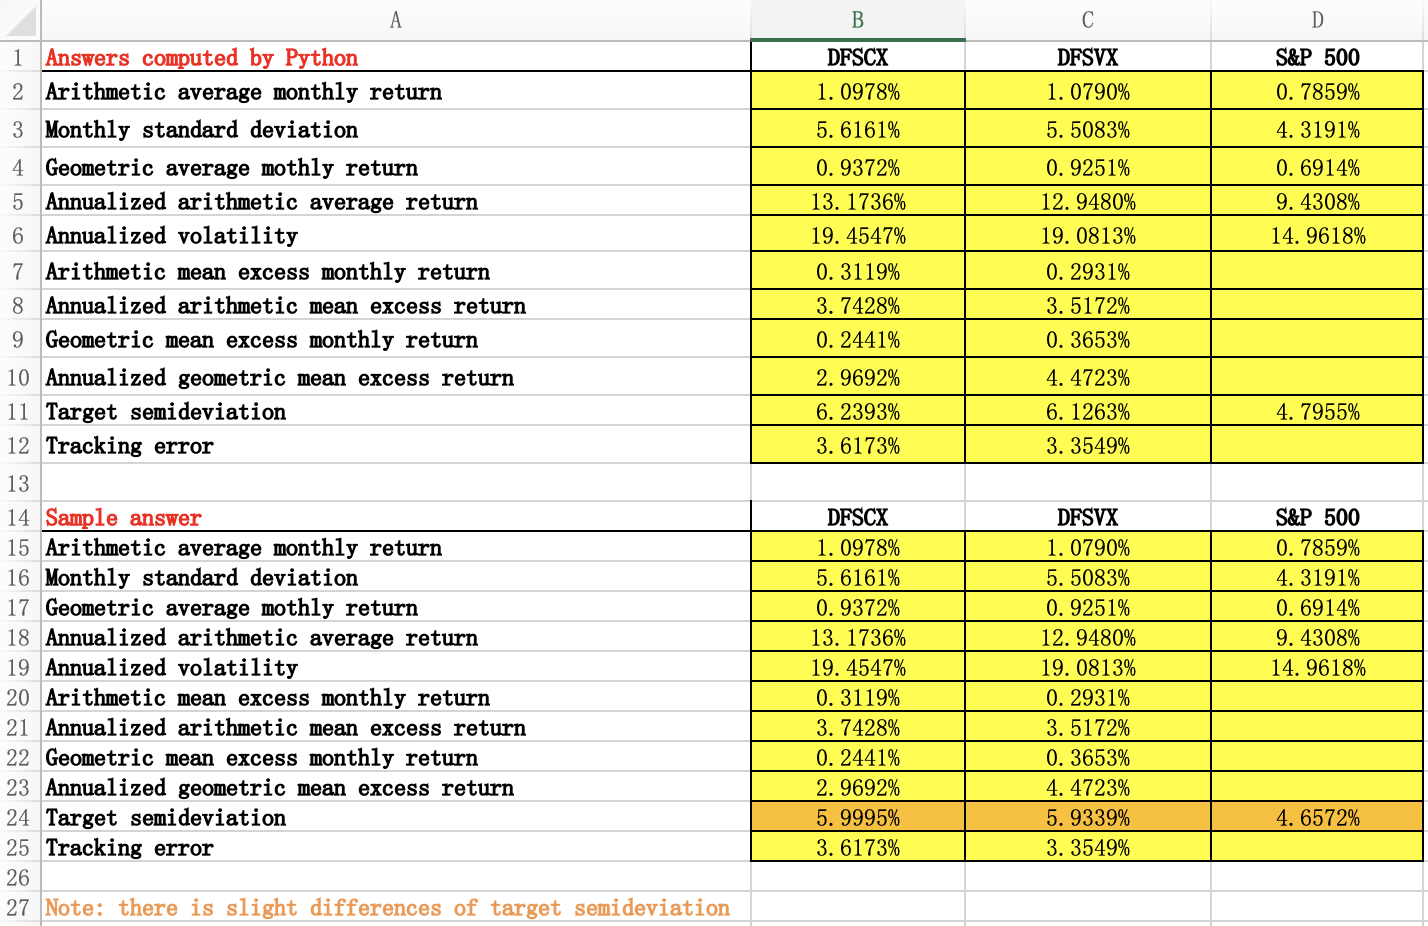

In [19]:
from IPython.display import Image
Image("./answers.png")